# Optimización de la red


## Dimensiones de una red neuronal
A continuación discutiremos la importancia y parametrización de las dimensiones de la red neuronal artiﬁcial.
En este sentido, debemos considerar:

- La dimensión de la capa de entrada.
- La dimensión de la capa de salida.
- La topología y dimensiones de las capas ocultas.

La dimensión de la capa de entrada se ﬁja inicialmente con el número de atributos que se consideran del conjunto de datos.

Hay que recordar que las estrategias de selección de atributos o reducción de dimensionalidad permiten a su vez reducir el número de elementos a considerar sin una pérdida excesiva en la capacidad de predicción del modelo.

Generalmente, en un problema de clasiﬁcación, se utiliza una neurona en la capa de salida para cada clase a representar, de modo que solo una neurona debería de «activarse» para cada instancia.

La topología y dimensión de la capa oculta no es un problema trivial y no existe una solución única y óptima a priori para este problema.

En general, añadir nuevas neuronas en las capas ocultas implica:

1. Aumentar el poder predictivo de la red, es decir, su capacidad de reconocimiento y predicción. Pero también aumenta el peligro de sobreajuste a los datos de entrenamiento.
2. Disminuir la posibilidad de caer en un mínimo local.
3. Alterar el tiempo de aprendizaje. Este varía de forma inversa al número de neuronas de las capas ocultas.

Por el contrario, una red con menos neuronas en las capas ocultas permite:

1. Reducir el riesgo de sobreespecialización a los datos de entrenamiento, ya que al disponer de menos nodos se obtiene un modelo más general.

En la práctica, se suele utilizar un número de neuronas en las capas ocultas que se encuentre entre una y dos veces el número de entradas de la red. Si se detecta que la red está sobreajustando, debemos reducir el número de neuronas en las capas ocultas. Por el contrario, si la evaluación del modelo no es satisfactoria, debemos aumentar el número de neuronas en las capas ocultas.
[Bosch et. al. 2019](https://elibro.net/es/ereader/ucags/126167?page=61)



---


La dificultad se centra en la capa oculta, ya que la definición del número de neuronas queda supeditada a la experticia del diseñador. Existen dos tendencias, empezar desde un muy alto número de neuronas y evaluar su funcionamiento y, luego, paulatinamente, ir decreciendo el número de neuronas hasta el instante en el cual, el error de aprendizaje y verificación se mantengan en el mínimo requerido.

La otra es empezar por un número pequeño de neuronas en la capa oculta, por ejemplo, igual al 50% de la dimensión del vector de entrada y, depués, empezar a crecer el tamaño de esta capa oculta verificando si su desempeño mejora; llegará un momento en el cual, aunque incrementemos el número de neuronas en la capa oculta, los errores no van a decrecer sustancialmente, consideramos que en este instante hemos llegado a un buen diseño de red. Si este desempeño no es satisfactorio debemos revisar la arquitectura de la red, el algoritmo de aprendizaje o la calidad de los datos. [Caicedo et al 2009](https://elibro.net/es/ereader/ucags/129183?page=102)

Finalmente, surge la pregunta ¿Cuántas capas ocultas debe tener un MLP?, para una gran cantidad de aplicaciones de alta complejidad, tres capas son suficientes, es decir solo una capa oculta. El utilizar más de una capa oculta, aumenta drásticamente la carga computacional de la red.

En general se recomienda  aumentar el tamaño de la capa oculta y no incrementar el número de capas ocultas, por ejemplo, si se tiene una red neuronal con diez neuronas en la capa oculta, computacionalmente es mejor, incrementar a 20 neuronas en esta capa y no generar una nueva capa oculta con diez neuronas más.

Por supuesto, que hay aplicaciones de alta complejidad, en las cuales es muy importante generar superficies de decisión altamente complejas y una segunda capa oculta es muy útil en este caso.[Caicedo et al 2009](https://elibro.net/es/ereader/ucags/129183?page=103)

## Implementación básica

A continuación se presenta una implementación básica que va agregando neuronas a la capa oculta

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

2023-10-07 09:33:40.034779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 09:33:40.427544: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-07 09:33:40.429977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 09:33:41.846716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Cargar el conjunto de datos Digits
datos_digitos = load_digits()

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = datos_digitos.data
y = datos_digitos.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Escalar las características para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Obten la lista de candidatos a numero de neuronas de la capa oculta
lista_numero_neuronas = np.linspace(64/2, 64*2, 9).astype(int)

lista_numero_neuronas

array([ 32,  44,  56,  68,  80,  92, 104, 116, 128])

In [4]:
entrenamientos = dict()
for numero_neuronas in tqdm(lista_numero_neuronas):
    #print(f"Tamaño de capa oculta {numero_neuronas}")
    modelo = keras.Sequential([
        layers.Dense(numero_neuronas, activation='relu', input_shape=(64,)),
        layers.Dense(10, activation='softmax')
    ])

    modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

    entrenamientos[numero_neuronas] = modelo.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)


  0%|          | 0/9 [00:00<?, ?it/s]

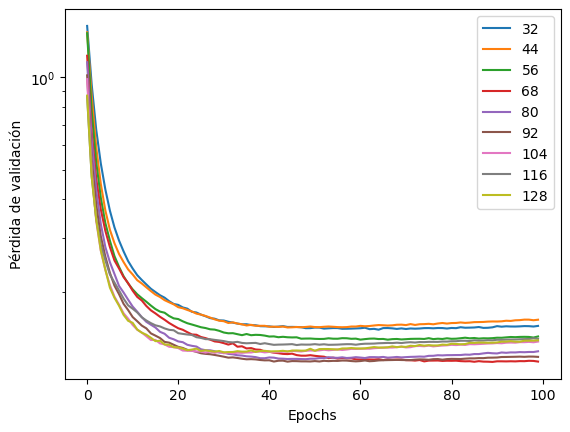

In [5]:
for numero_neuronas in lista_numero_neuronas:
    plt.semilogy(entrenamientos[numero_neuronas].history["val_loss"], label=f"{numero_neuronas}")

plt.xlabel('Epochs')
plt.ylabel('Pérdida de validación')
plt.legend()

In [11]:
#entrenamos solo con la mejor cantidad de neuronas
#numero_neuronas = 128
numero_neuronas = 92
modelo = keras.Sequential([
    layers.Dense(numero_neuronas, activation='relu', input_shape=(64,)),
    layers.Dense(10, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(X_train, y_train, epochs=80, validation_split=0.1, verbose=0)

In [12]:
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Pérdida en el conjunto de prueba: 0.0766
Precisión en el conjunto de prueba: 98.33%


## Utilizando herramientas de keras

Keras Tuner es una biblioteca de Python que se utiliza para la optimización automática de hiperparámetros en modelos de aprendizaje automático, especialmente en modelos construidos con Keras.



In [13]:
! pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 857.6 kB/s eta 0:00:001m859.7 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 3.6 MB/s eta 0:00:003.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01


In [14]:
from keras_tuner import HyperParameters
from keras_tuner.tuners import RandomSearch


Using TensorFlow backend


In [15]:
def construir_modelo(hp):
    modelo = keras.Sequential()
    modelo.add(layers.Input(shape=(64,)))

    # COnfigura el numero de capas ocultas
    for i in range(hp.Int('num_capas', min_value=1, max_value=3)):
        modelo.add(layers.Dense(units=hp.Int('neuroanas_capa_' + str(i), min_value=64/2, max_value=64*2, step=8),
                               activation='relu'))

    modelo.add(layers.Dense(10, activation='softmax'))
    modelo.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return modelo

In [16]:
tuner = RandomSearch(
    construir_modelo,
    objective='val_accuracy',
    max_trials=10, # dies intentos en general
    executions_per_trial=3, # intentar tres veces para evitar chiripazos
    directory='s08_datos_tunner',
    project_name='proyecto_tunner_2'
)

In [17]:
# Subdividir entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.9884259104728699

Best val_accuracy So Far: 0.9907407363255819
Total elapsed time: 00h 03m 25s


In [19]:
mejor_modelo = tuner.get_best_models(num_models=1)[0]
mejor_hiperparametros = tuner.get_best_hyperparameters(num_trials=1)[0]
mejor_modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               7800      
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 9010 (35.20 KB)
Trainable params: 9010 (35.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
mejor_hiperparametros.values

{'num_capas': 1,
 'neuroanas_capa_0': 120,
 'neuroanas_capa_1': 56,
 'neuroanas_capa_2': 48}

In [21]:
mejor_modelo.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 0.0375 - accuracy: 0.9965 - val_loss: 0.0703 - val_accuracy: 0.9896
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9965 - val_loss: 0.0668 - val_accuracy: 0.9965
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9983 - val_loss: 0.0641 - val_accuracy: 0.9931
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9983 - val_loss: 0.0624 - val_accuracy: 0.9931
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9991 - val_loss: 0.0589 - val_accuracy: 0.9931
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9931
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9896
Epoch 8/50
36/36 [==

In [22]:
test_loss, test_accuracy = mejor_modelo.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

12/12 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9917
Pérdida en el conjunto de prueba: 0.0349
Precisión en el conjunto de prueba: 99.17%


## Seguimiento de experimientos

El seguimiento de experimentos es el registro sistemático de todos los aspectos relevantes de un experimento o proyecto. El objetivo principal del seguimiento de experimentos es mantener un registro detallado y organizado de todas las etapas del proceso experimental, lo que incluye la recopilación de datos, la preparación de datos, la selección de modelos, la configuración de hiperparámetros, el entrenamiento de modelos, la evaluación de modelos y la generación de resultados.

Algunos de los elementos clave que suelen registrarse durante el seguimiento de experimentos son:

1. **Datos**: Información sobre la fuente de datos, cómo se recopilaron o se obtuvieron, cualquier preprocesamiento realizado y cómo se dividió en conjuntos de entrenamiento, validación y prueba.

2. **Parámetros**: Los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del lote, el número de capas y neuronas en una red neuronal, etc.

3. **Métricas**: Resultados numéricos que evalúan el rendimiento del modelo, como la precisión, la pérdida, el error cuadrático medio, el F1-score, etc.

4. **Artefactos**: Cualquier archivo o recurso externo generado durante el experimento, como modelos guardados, gráficos, imágenes, registros de entrenamiento, etc.

5. **Comentarios y Notas**: Observaciones, comentarios y notas que explican las decisiones tomadas durante el proceso experimental, los problemas encontrados y cualquier otra información relevante.

6. **Configuraciones de Hardware y Software**: Información sobre la configuración de hardware (por ejemplo, GPU utilizadas) y las versiones de software, bibliotecas y entornos utilizados durante el experimento.

7. **Versionado**: Control de versiones de código y modelos para permitir la reproducción exacta de los resultados.

8. **Fechar y Hora**: Registros de la fecha y hora de cada etapa del experimento para rastrear la secuencia de eventos.

La práctica del seguimiento de experimentos es esencial para varios propósitos:

- **Optimización de Hiperparámetros**: Ayuda a identificar la combinación óptima de hiperparámetros para un modelo.

- **Reproducibilidad**: Permite que otros científicos de datos o colaboradores reproduzcan los resultados del experimento en un momento posterior.

- **Comparación**: Facilita la comparación de múltiples configuraciones de modelos o enfoques para encontrar las mejores soluciones.



[MLflow](https://mlflow.org) es una plataforma de código abierto diseñada para administrar todo el ciclo de vida de los proyectos de machine learning, desde la experimentación hasta la implementación y el monitoreo de modelos. Una de las características clave de MLflow es realizar seguimiento y registro de experimentos, lo que permite mantener un registro organizado de experimentos y resultados.

A Continuación veremos un ejemplo oficial con keras


In [2]:
! pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.8 MB/s eta 0:00:00


In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

import mlflow
import os

In [4]:
mlflow.set_tracking_uri("http://158.101.3.227:83/")
mlflow.create_experiment("Mit")
os.environ["MLFLOW_EXPERIMENT_NAME"] = "Mit"


In [8]:
mlflow.tensorflow.autolog()

max_words = 1000
#batch_size = 32
batch_size = 64
epochs = 10

print("Loading data...")
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

num_classes = np.max(y_train) + 1
print(num_classes, "classes")

print("Vectorizing sequence data...")
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode="binary")
x_test = tokenizer.sequences_to_matrix(x_test, mode="binary")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print("Convert class vector to binary class matrix (for use with categorical_crossentropy)")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("Building model...")
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1
)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])